# Actividad Módulo 27: Introducción a Regresión
1. Importación de un modelo con datos de ventas de casas (housing.csv)
2. EDA Completo siguiendo los modelos anteriores
3. Feature engineering - estandarización, eliminación y creación de nuevas columnas
4. Generación de variables dummy en el set de datos
5. Aplicación del modelo de regresión lineal a la variable Price
6. Entrenamiento y evaluación del modelo
7. Análisis de sensibilidad e importancia de variables
8. Visualización de los resultados del modelo de regresión
9. Matriz de confusión y medidas del modelo
10. Conclusiones

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df = pd.read_csv('Housing.csv')
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
263,4410000,3968,3,1,2,no,no,no,no,no,0,no,semi-furnished
35,8080940,7000,3,2,4,yes,no,no,no,yes,2,no,furnished
519,2450000,4840,2,1,2,yes,no,no,no,no,0,no,unfurnished
298,4200000,5800,3,1,1,yes,no,no,yes,no,2,no,semi-furnished
42,7700000,6480,3,2,4,yes,no,no,no,yes,2,no,unfurnished


## Exploratory Data Analysis
- Propiedades generales del df - shape, info, cantidad de nulos
- Análisis univariado - Histogramas de cada columna
- Análisis Bivariado - Matriz de correlación, crosstabs

In [108]:
# Tamaño del dataframe
df.shape

(545, 13)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [110]:
# Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [111]:
# Determinar si será necesaria la imputación de datos
print('Cantidad de datos faltantes por columna')
df.isnull().sum()

# La imputación de datos no será necesaria

Cantidad de datos faltantes por columna


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

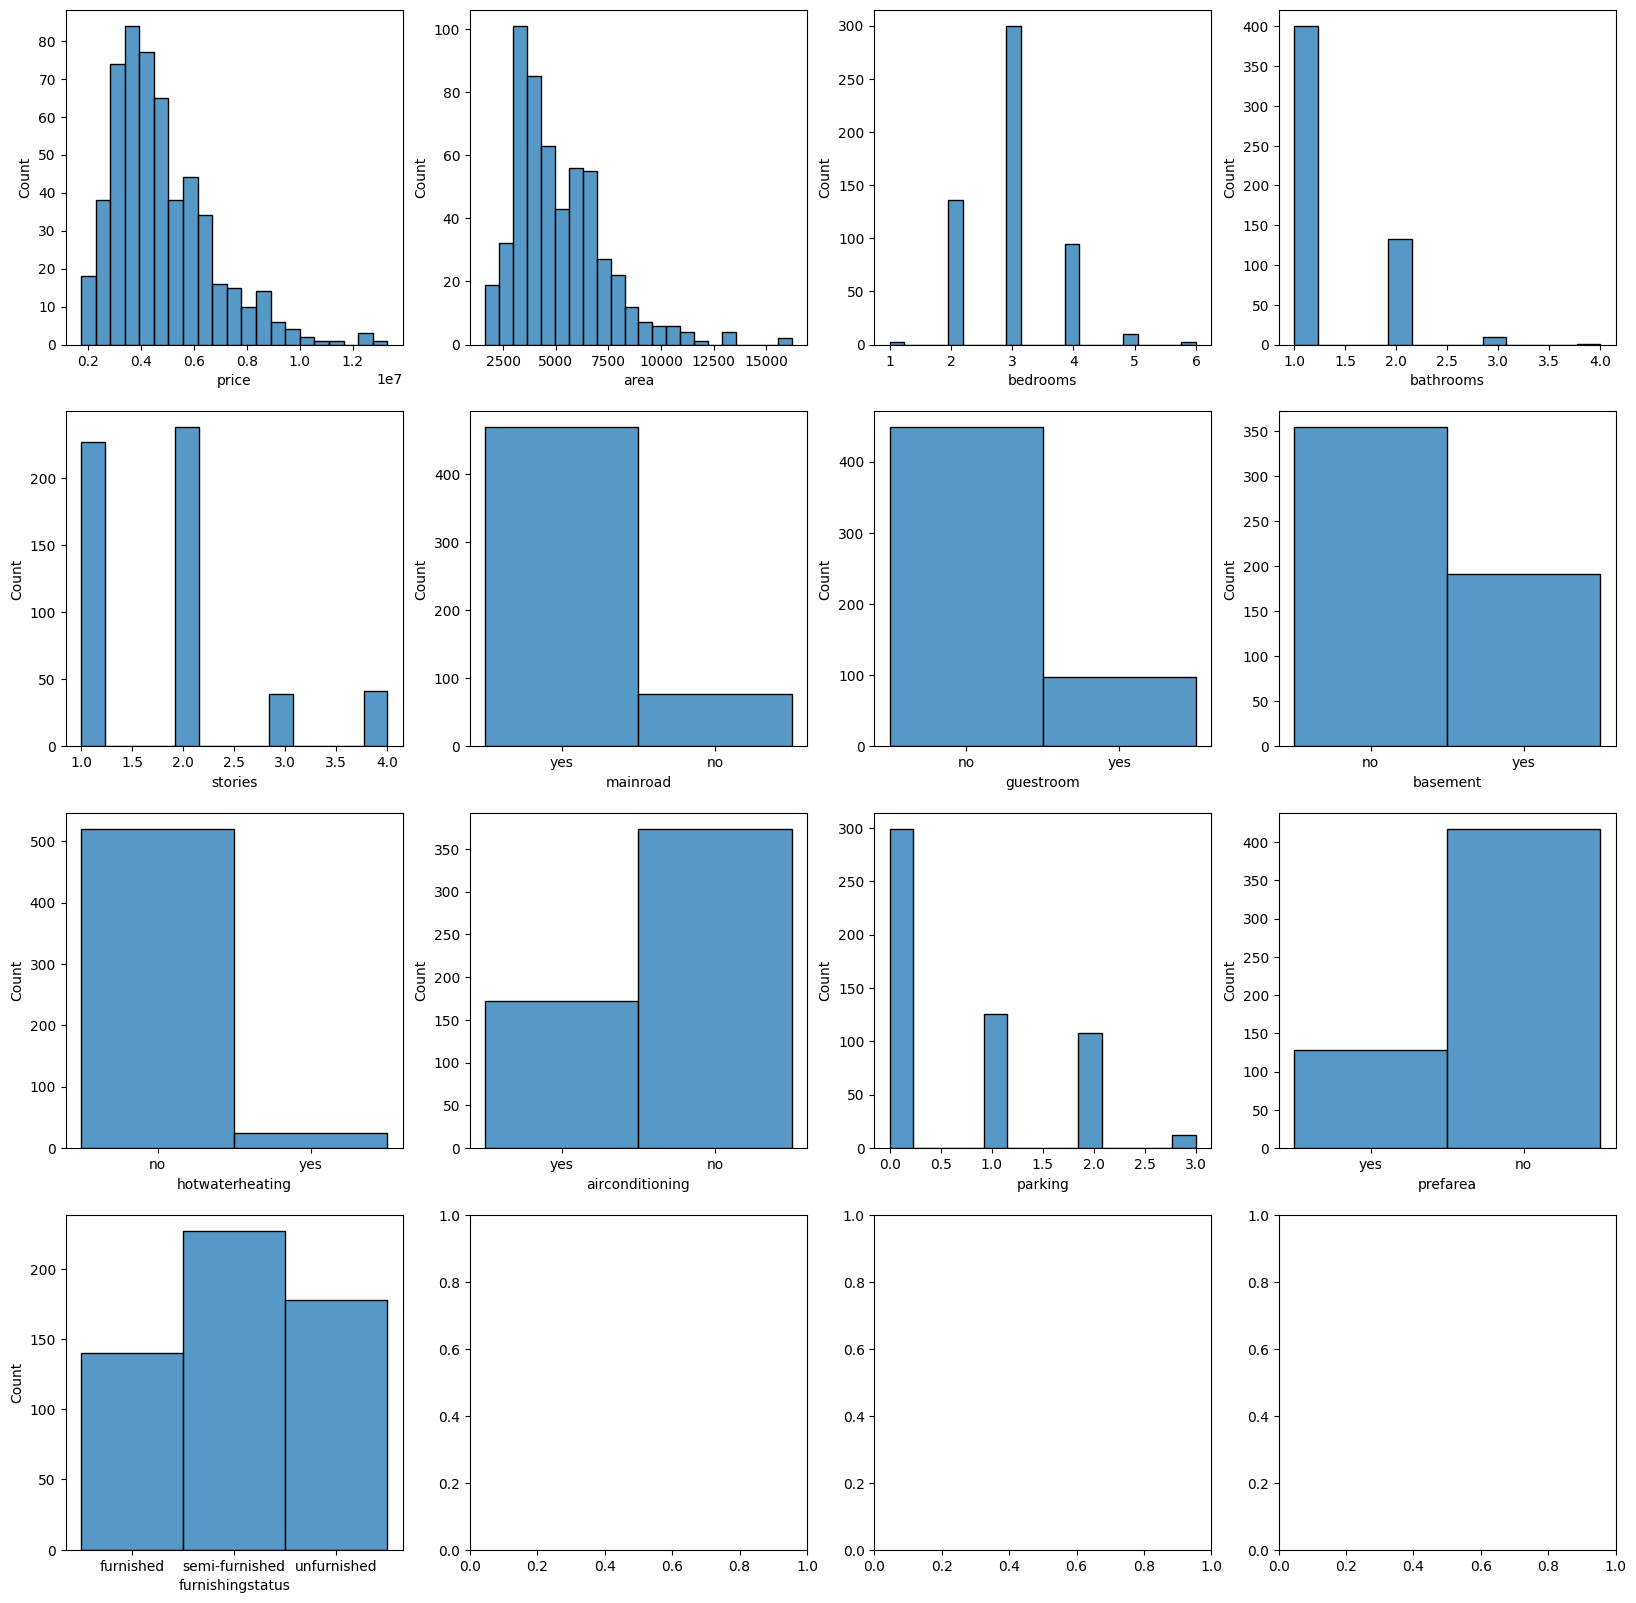

In [112]:
 # Análisis univariado - distribuciones de las variables

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20,20))

for i, col in enumerate(df.columns):
    sns.histplot(data=df, x=col, ax=ax[i//4, i%4])


C:\Users\USER\AppData\Local\Temp\ipykernel_9844\516176349.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='pearson')


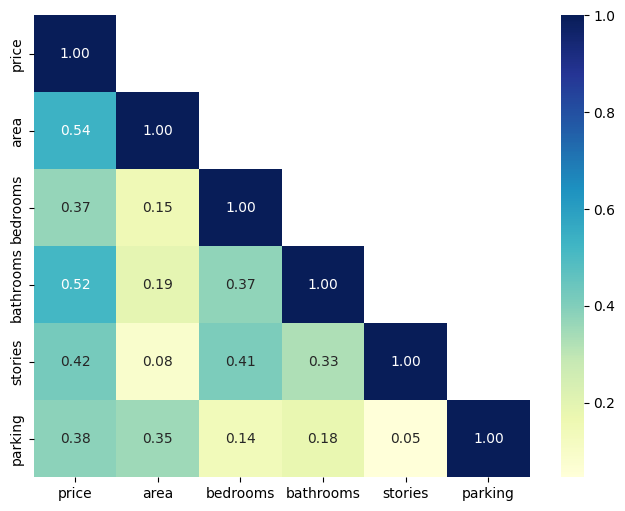

In [113]:
# Matriz de correlación
corr = df.corr(method='pearson')
plt.figure(figsize=(8,6))
df_lt = corr.where(np.tril(np.ones(corr.shape)).astype(bool))
hmap  = sns.heatmap(data=df_lt, annot=True, cmap='YlGnBu', fmt='.2f')

<AxesSubplot: ylabel='bedrooms'>

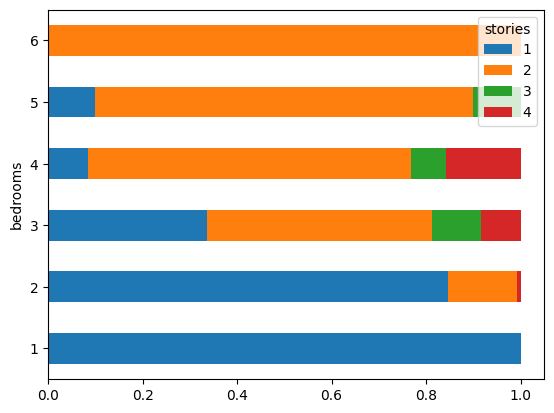

In [114]:
# Crosstabs
pd.crosstab(index=df['bedrooms'], columns=df['stories'], normalize='index').plot.barh(stacked=True)

<AxesSubplot: ylabel='stories'>

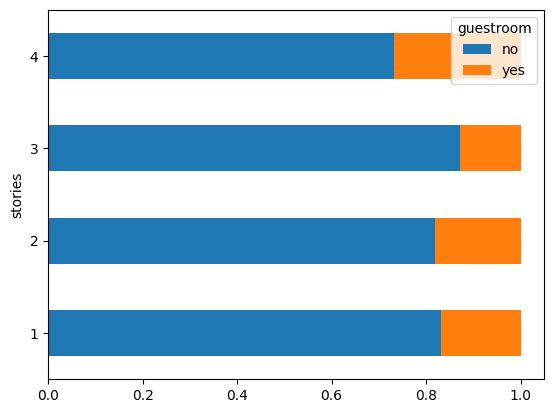

In [115]:
pd.crosstab(index=df['stories'], columns=df['guestroom'], normalize='index').plot.barh(stacked=True)

<AxesSubplot: ylabel='parking'>

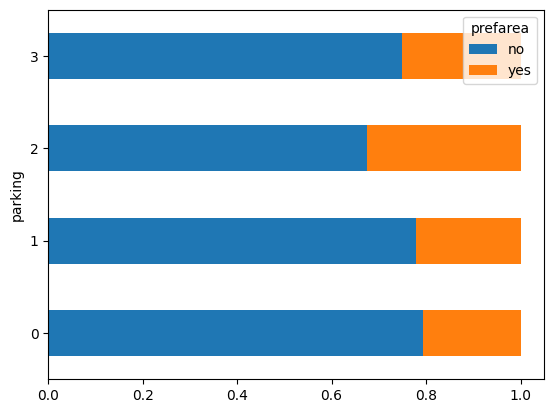

In [116]:
pd.crosstab(index=df['parking'], columns=df['prefarea'], normalize='index').plot.barh(stacked=True)

<AxesSubplot: ylabel='furnishingstatus'>

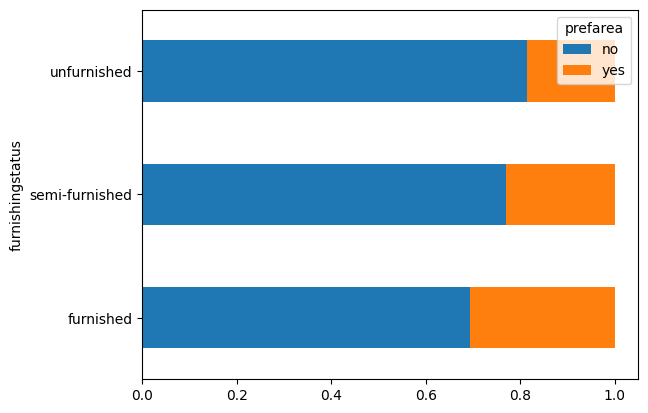

In [117]:
pd.crosstab(index=df['furnishingstatus'], columns=df['prefarea'], normalize='index').plot.barh(stacked=True)

<AxesSubplot: xlabel='stories', ylabel='price'>

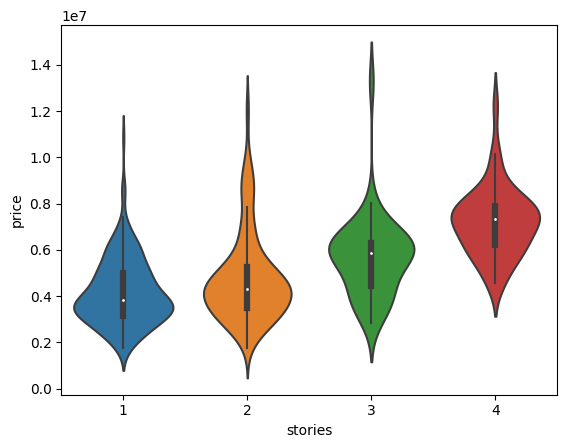

In [118]:
# Violin Charts
sns.violinplot(data=df, x='stories', y='price')

<AxesSubplot: xlabel='prefarea', ylabel='price'>

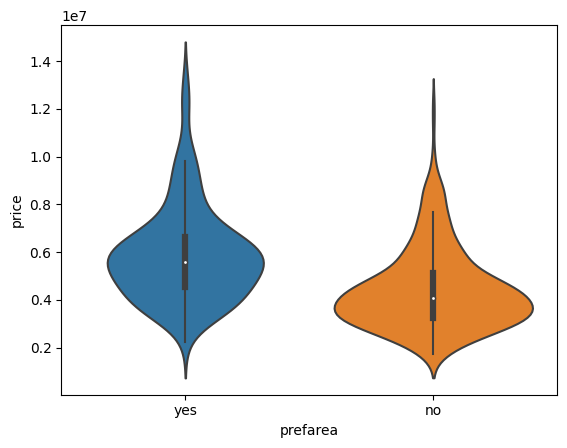

In [119]:
sns.violinplot(data=df, x='prefarea', y='price')

<AxesSubplot: xlabel='prefarea', ylabel='area'>

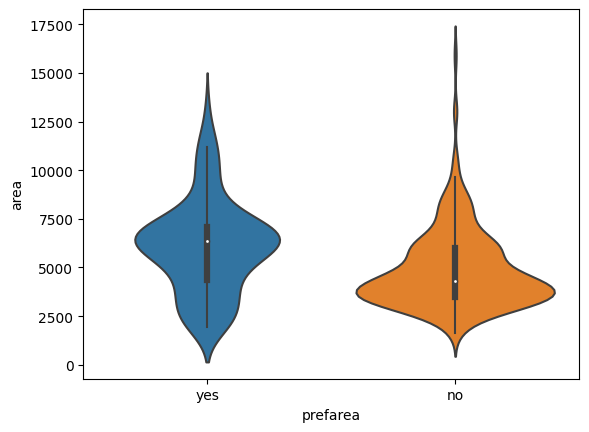

In [120]:
sns.violinplot(data=df, x='prefarea', y='area')

<AxesSubplot: xlabel='furnishingstatus', ylabel='price'>

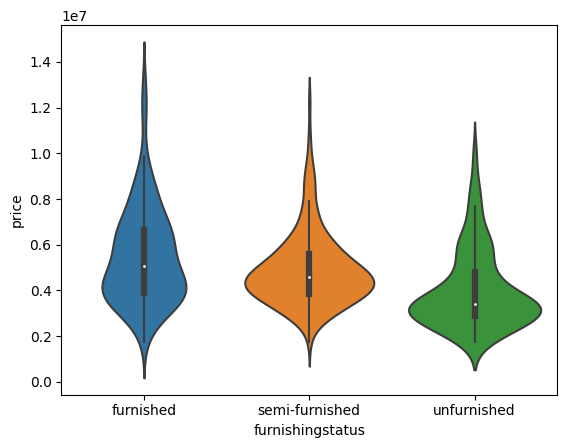

In [121]:
sns.violinplot(data=df, x='furnishingstatus', y='price')

In [122]:
# Revisar si hay clases subrepresentadas, especialmente para variables con multiples categorías (diferentes a 1/0, si/no, true/false)
pd.crosstab(index=df['bedrooms'], columns='col', normalize=True)

col_0,col
bedrooms,
1,0.003670
2,0.249541
3,0.550459
4,0.174312
5,0.018349
6,0.003670


In [123]:
pd.crosstab(index=df['bathrooms'], columns='col', normalize=True)

col_0,col
bathrooms,
1,0.735780
2,0.244037
3,0.018349
4,0.001835


In [124]:
pd.crosstab(index=df['stories'], columns='col', normalize=True)


col_0,col
stories,
1,0.416514
2,0.436697
3,0.071560
4,0.075229


In [125]:
pd.crosstab(index=df['hotwaterheating'], columns='col', normalize=True)


col_0,col
hotwaterheating,
no,0.954128
yes,0.045872


In [126]:
pd.crosstab(index=df['parking'], columns='col', normalize=True)


col_0,col
parking,
0,0.548624
1,0.231193
2,0.198165
3,0.022018


### EDA Insights
- No hay datos faltantes en el dataset, no será necesaria la imputación de datos
- No existe alta correlación entre ningún par de variables, por lo que no será necesario quitar una variable por posible multicolinealidad
- Tanto el área como el precio son variables con sesgo, se necesitarán transformar con logarítmo natural
- Existen clases desbalanceadas dentro de las variables categóricas bedrooms, bathrooms, parking (categorías que se encuentran presentes en menos del 5% de los registros del dataset)
- Hay variables categóricas que se pueden pasar directamente a 1/0, otras se pueden pasar a numéricos 1,2,3... o se pueden hacer variables dummies

---

## Feature Engineering
- Transformación de columnas con sesgo si es necesario
- Estandarización de columnas con escalas diferentes al resto
- Transformación de columnas con variables categóricas a 1/0

In [137]:
# Crear copia del df antes de alterarlo
df2 = df.copy()

# No se transformarán las columnas con sesgo para no alterar la moderada correlación entre area y precio (la variable de respuesta)

In [128]:
# Transformar variables categóricas yes/no en 1/0
df2['mainroad'] = df2.mainroad.replace(to_replace={'yes':1, 'no':0})
df2['guestroom'] = df2.guestroom.replace(to_replace={'yes':1, 'no':0})
df2['basement'] = df2.basement.replace(to_replace={'yes':1, 'no':0})
df2['airconditioning'] = df2.airconditioning.replace(to_replace={'yes':1, 'no':0})
df2['prefarea'] = df2.prefarea.replace(to_replace={'yes':1, 'no':0})
df2['hotwaterheating'] = df2.hotwaterheating.replace(to_replace={'yes':1, 'no':0})


df2.sample(5)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
215,4830000,4160,3,1,3,1,0,0,0,0,0,0,unfurnished
448,3150000,4095,2,1,1,1,0,0,0,0,2,0,semi-furnished
279,4270000,6360,2,1,1,1,0,0,0,0,0,0,furnished
67,6895000,7700,3,2,1,1,0,0,0,0,2,0,unfurnished
527,2275000,1836,2,1,1,0,0,1,0,0,0,0,semi-furnished


In [129]:
# Generación de variables dummy (para furnishing status)
df2 = pd.get_dummies(df2)

## Modelo de regresión lineal

In [130]:
# Aplicación de un modelo de regresión lineal
x = df2.drop(columns=['price'])
y = df2.price

# División del dataset en training y testing - 70% training, 30% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)

In [131]:
# Ejecutar modelo de regresion lineal
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()

# Entrenamiento del modelo
regression_model.fit(X=x_train, y=y_train)

LinearRegression()

In [132]:
# Evaluación del modelo de regresión
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error

y_predict = regression_model.predict(X=x_test)

print('Score: ', regression_model.score(X=x_test, y=y_test))
print(f'R2: {r2_score(y_true=y_test, y_pred=y_predict):.2f}')
print(f'Mean absolute error: {mean_absolute_error(y_true=y_test, y_pred=y_predict):.2f}')
print(f'Mean squared error: {mean_squared_error(y_true=y_test, y_pred=y_predict):.2f}')
print(f'Mean absolute percentage error: {mean_absolute_percentage_error(y_true=y_test, y_pred=y_predict) * 100 :.2f}%')

Score:  0.6551538994436636
R2: 0.66
Mean absolute error: 776617.87
Mean squared error: 983053988613.61
Mean absolute percentage error: 18.72%


Text(0.5, 1.0, 'Residuales (prediction-real)')

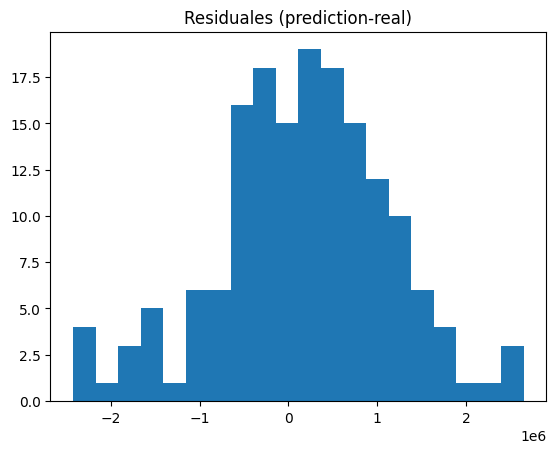

In [133]:
# Revisión de los residuales entre la prediccción del modelo y el valor real
plt.hist(x=y_predict-y_test, bins=20)
plt.title('Residuales (prediction-real)')

In [134]:
# Probar la normalidad de los residuales del modelo
from scipy.stats import shapiro     # Shapiro-Wilkinson Normality Test

stat, p = shapiro(x=y_predict-y_test)
print('stat=%.3f, p=%.3f\n' % (stat,p))

if p > .05:
    print('Probably Gaussian (Normally distributed)')
else:
    print('Probably not Gaussian')

stat=0.987, p=0.129

Probably Gaussian (Normally distributed)


### Insights:
- El modelo entrenado puede explicar el 64% de las observaciones de testing, con estto se podría esperar que genere predicciones cercanas a la realidad en un 64% de las ocasiones
- El error medio absoluto es de 755k, esto quiere decir que se espera que el error entre la predicción y el valor real de la casa sea de ese valor (puede ser tanto para arriba del precio real, como para abajo), lo cual representa un 17% de diferencia respecto al precio real esperado
- De acuerdo con el test de normalidad de Shapiro-Wilkinson, los residuales siguen una distribución normal

---
## Análisis de sensibilidad e importancia de las variables
- Visualizar e interpretar la ecuación de regresión

In [135]:
regression_model.coef_

array([ 2.85029158e+02,  1.13153075e+05,  1.04151110e+06,  4.57224498e+05,
        3.77914563e+05,  1.92276168e+05,  4.01201148e+05,  5.95015192e+05,
        8.13118787e+05,  2.52507075e+05,  5.86399635e+05,  2.06361637e+05,
        1.13124460e+05, -3.19486096e+05])

In [136]:
# Imprimir los coeficientes de las diferentes variables

for idx, col_name in enumerate(x_train.columns):
    print("Coef {} = {:,.2f}".format(col_name, regression_model.coef_[idx]))

print(f'Intercept = {regression_model.intercept_:,.2f}')

Coef area = 285.03
Coef bedrooms = 113,153.08
Coef bathrooms = 1,041,511.10
Coef stories = 457,224.50
Coef mainroad = 377,914.56
Coef guestroom = 192,276.17
Coef basement = 401,201.15
Coef hotwaterheating = 595,015.19
Coef airconditioning = 813,118.79
Coef parking = 252,507.08
Coef prefarea = 586,399.63
Coef furnishingstatus_furnished = 206,361.64
Coef furnishingstatus_semi-furnished = 113,124.46
Coef furnishingstatus_unfurnished = -319,486.10
Intercept = -246,097.94


### Insights
- Dados los coeficientes, se puede concluir:
    - Por cada pie cuadrado de área, se espera pagar $285 más
    - Por cada baño, se espera que el costo de la casa suba en poco más de un millón, siendo la variable con mayor sensibilidad
    - La segunda variable con mayor sensibilidad es el aire acondicionado. Si la unidad posee aire acondicionado, se espera qeu incremente el costo en $813k
    - Cuando la casa viene sin amublar, se puede ver que es 432k más barata que cuando esta semi-amueblada y 525k más barata que cuando se encuentra completamente amueblada
    - Otras variables sensibles:
        - Stories - 457k por cada piso que posee la casa
        - Basement - 401k más si tiene sótano
        - Hot Water - 595k más si tiene calefacción de agua
        - Pref Area - 586k más si se encuentra en área preferencial
---
## Visualización de los resultados del modelo de regresión

Text(0.5, 1.0, 'Comparación de Predicción (x) y Real (y)')

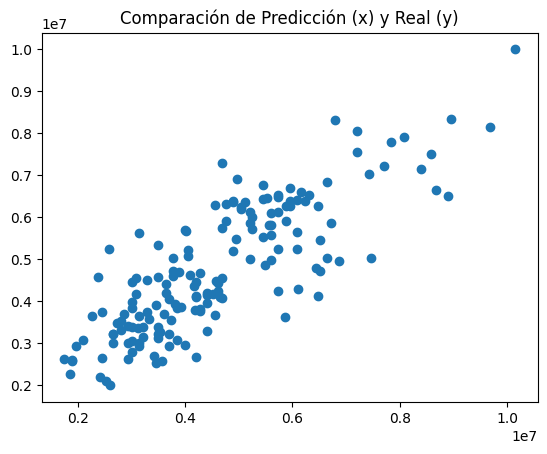

In [138]:
predictions = regression_model.predict(x_test)
plt.scatter(y_test, predictions)
plt.title('Comparación de Predicción (x) y Real (y)')

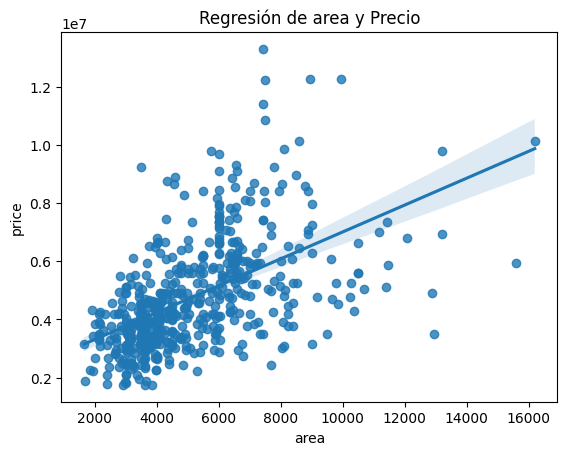

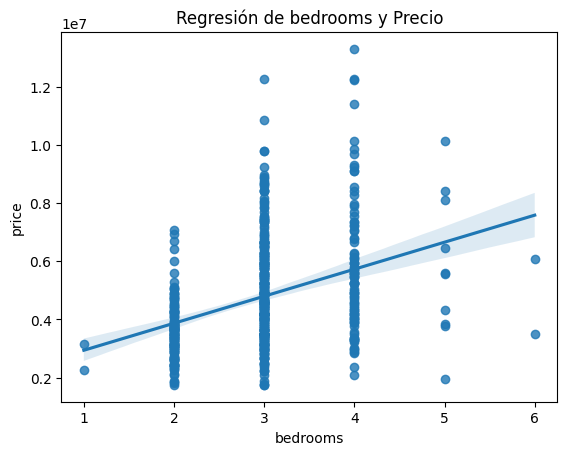

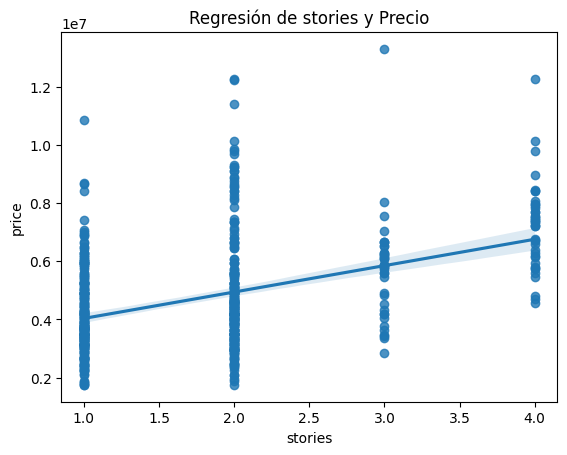

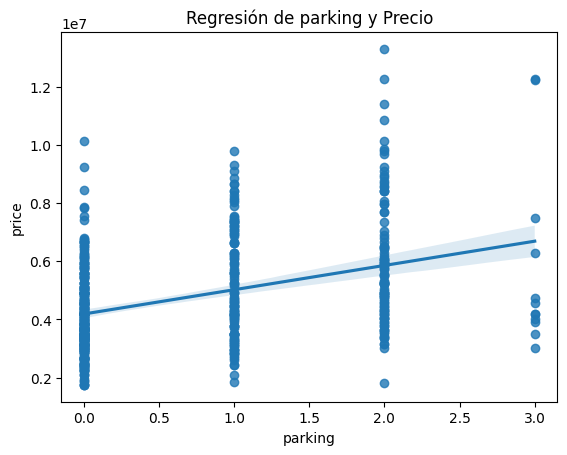

In [140]:
variables = ['area', 'bedrooms', 'stories' ,'parking']
for var in variables:
    plt.figure()
    sns.regplot(x=var, y='price', data=df2).set(title=f'Regresión de {var} y Precio')

## Conclusiones
Nota: se dejo fuera la matriz de confusión puesto que no es posible evaluar el desempeño de un modelo de regresión lineal con este método
- El modelo entrenado puede explicar el 64% de las observaciones de testing, con estto se podría esperar que genere predicciones cercanas a la realidad en un 64% de las ocasiones
- El error medio absoluto es de 755k, esto quiere decir que se espera que el error entre la predicción y el valor real de la casa sea de ese valor (puede ser tanto para arriba del precio real, como para abajo), lo cual representa un 17% de diferencia respecto al precio real esperado
- De acuerdo con el test de normalidad de Shapiro-Wilkinson, los residuales siguen una distribución normal
- Existen variables de alta sensibilidad que pueden hacer que el precio de la casa cambie drásticamente como:
    - La cantidad de baños
    - Si está no amueblada, semi-amueblada o totalmente amueblada
    - Si tiene aire acondicionado
    - El número de pisos que tiene la casa
    - Si tiene o no sótano
    - Si tiene calefacción de agua
    - Si está en un área preferencial